 ## Ciencia de Datos - Universidad de Los Andes
 ## Segunda Entrega - Proyecto Final (Parte 1)
 
 ### Integrantes: Andrés Araque, David Cargua, Cristian Bravo

 Este notebook contiene la selección de datos y construcción de un Dataset compuesto de tres diferentes datasets sobre siniestros viales para la ciudad de Bogotá D.C. entre los años 2015 y 2019

In [45]:
 ## Imports
 
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [ ]:
## Cargamos el primer dataset

df = pd.read_csv('siniestros_2017.csv', sep=',', encoding='latin-1')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,Dia,Fecha_x,MES_PROCESADO_x,Oficina,GravedadCod,GravedadNombre,ClaseCodigo,ClaseNombre,ChoqueCodigo,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,Direccion,TipoVia1,NumeroVia1,LetraVia1,CardinalVia1,TipoVia2,NumeroVia2,LetraVia2,CardinalVia2,Complemento,Municipio,Localidad,FechaOcurrencia,HoraOcurrencia,HORA_PROCESADA,Area,Sector,Zona,TipoDisenno,TipoTiempo,CoordenadaX,CoordenadaY,CON_BICICLETA_x,...,CON_CARGA_y,CON_EMBRIAGUEZ_y,CON_HUECOS_y,CON_MENORES_y,CON_MOTO_y,CON_PEATON_y,CON_PERSONA_MAYOR_y,CON_RUTAS_y,CON_TPI_y,CON_VELOCIDAD_y,Fecha,MES_PROCESADO,DIA_PROCESADO_y,Numero,EDAD_PROCESADA_y,LLevaCinturon_y,LlevaChaleco,LLevaCasco_y,Peaton_Pasajero,CodigoVehiculo,Sexo_y,GRAVEDAD_PROCESADA_y,ClaseOficial_y,GradoOficial_y,UnidadOficial_y,EstabaEnServicio,Trasladado_en,VEHICULO_VIAJABA,VEHICULO_VIAJABA_CLASIFICADO_y,CON_BICICLETA,CON_CARGA,CON_EMBRIAGUEZ,CON_HUECOS,CON_MENORES,CON_MOTO,CON_PEATON,CON_PERSONA_MAYOR,CON_RUTAS,CON_TPI,CON_VELOCIDAD
0,1,LUNES,2017-01-09,ENERO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,AV AVENIDA DEL SUR-KR 71B 02,AV,AVENIDA DEL SUR,NaN,NaN,KR,71.0,B,NaN,2.0,BOGOTA D.C.,BOSA,2017-01-09,17:40:00,17,1,1,3,Tramo de Via,Normal,0.0,0.0,NO,...,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,2017-12-10,DICIEMBRE,DOMINGO,1,82.0,NaN,NaN,NaN,Peaton,0,FEMENINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,PEATON,PEATON,NO,NO,NO,NO,NO,SI,SI,SI,NO,NO,NO
1,1,LUNES,2017-01-09,ENERO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,AV AVENIDA DEL SUR-KR 71B 02,AV,AVENIDA DEL SUR,NaN,NaN,KR,71.0,B,NaN,2.0,BOGOTA D.C.,BOSA,2017-01-09,17:40:00,17,1,1,3,Tramo de Via,Normal,0.0,0.0,NO,...,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,2017-12-07,DICIEMBRE,JUEVES,1,9.0,NaN,NaN,NaN,Peaton,0,MASCULINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,PEATON,PEATON,NO,NO,NO,NO,SI,NO,SI,NO,NO,NO,NO
2,2,MIÃRCOLES,2017-01-04,ENERO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,CL 80-KR 69 02,CL,80,NaN,NaN,KR,69.0,NaN,NaN,2.0,BOGOTA D.C.,ENGATIVA,2017-01-04,20:40:00,20,1,1,3,Tramo de Via,Normal,0.0,0.0,NO,...,NO,NO,NO,NO,NO,NO,SI,NO,SI,NO,2017-11-25,NOVIEMBRE,SÃBADO,3,11.0,N,NaN,NaN,Pasajero,1,FEMENINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,AUTOMOVIL,TAXI,NO,NO,NO,NO,SI,NO,NO,NO,NO,SI,NO
3,2,MIÃRCOLES,2017-01-04,ENERO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,CL 80-KR 69 02,CL,80,NaN,NaN,KR,69.0,NaN,NaN,2.0,BOGOTA D.C.,ENGATIVA,2017-01-04,20:40:00,20,1,1,3,Tramo de Via,Normal,0.0,0.0,NO,...,NO,NO,NO,NO,NO,NO,SI,NO,SI,NO,2017-11-25,NOVIEMBRE,SÃBADO,2,0.0,N,NaN,NaN,Pasajero,1,MASCULINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,AUTOMOVIL,TAXI,NO,NO,NO,NO,SI,NO,NO,NO,NO,SI,NO
4,3,SÃBADO,2017-01-28,ENERO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,KR 7-CL 34 22,KR,7,NaN,NaN,CL,34.0,NaN,NaN,22.0,BOGOTA D.C.,SANTA FE,2017-01-28,12:01:00,12,1,1,0,Tramo de Via,Normal,0.0,0.0,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,2017-11-25,NOVIEMBRE,SÃBADO,1,36.0,N,NaN,NaN,Pasajero,1,MASCULINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,AUTOMOVIL,TAXI,NO,NO,NO,NO,SI,NO,NO,NO,NO,SI,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,4529,MIÃRCOLES,2017-02-15,FEBRERO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,CL 63-KR 60 02,CL,63,NaN,NaN,KR,60.0,NaN,NaN,2.0,BOGOTA D.C.,BARRIOS UNIDOS,2017-02-15,11:00:00,11,1,1,0,Glorieta,Normal,0.0,0.0,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,2017-01-01,ENERO,DOMINGO,1,53.0,S,NaN,NaN,AcompaÃ±ante,1,FEMENINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,AUTOMOVIL,LIVIANO,NO,NO,NO,NO,NO,NO,NO,SI,NO,SI,NO
8598,4529,MIÃRCOLES,2017-02-15,FEBRERO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,CL 63-KR 60 02,CL,63,NaN,N

In [ ]:
## En el sprint anterior se seleccionaron las siguientes variables de referencia

print(df["GravedadNombre"].unique())
print(df["Localidad"].unique())
print(df["TipoVia2"].unique())
print(df["VEHICULO_VIAJABA"].unique())
print(df["Dia"].unique())
print(df["MES_PROCESADO_x"].unique())

['Solo DaÃ±os' 'Con Heridos' 'Con Muertos']
['BOSA' 'ENGATIVA' 'SANTA FE' 'SUBA' 'KENNEDY' 'PUENTE ARANDA'
 'BARRIOS UNIDOS' 'FONTIBON' 'USAQUEN' 'CIUDAD BOLIVAR'
 'RAFAEL URIBE URIBE' 'TUNJUELITO' 'CHAPINERO' 'SAN CRISTOBAL' 'USME'
 'TEUSAQUILLO' 'ANTONIO NARIÃ\x91O' 'LOS MARTIRES' 'CANDELARIA']
['KR' 'CL' 'AV' 'DG' 'AK' 'TR' 'AC' nan]
['PEATON' 'AUTOMOVIL' 'BUS' 'MOTOCICLETA' 'CAMIONETA' 'CAMION, FURGON'
 'MICROBUS' 'BUSETA' 'CAMPERO' 'TRACTOCAMION' 'BICICLETA' 'MOTOCARRO']
['LUNES' 'MIÃ\x89RCOLES' 'SÃ\x81BADO' 'DOMINGO' 'MARTES' 'JUEVES'
 'VIERNES']
['ENERO' 'FEBRERO' 'MARZO' 'ABRIL' 'MAYO' 'JUNIO']


In [ ]:
## Agrupamos la data del primer dataset
## Se genera uno con más datos y otro con menos

df_g = df.groupby(["Fecha_x","Dia","HORA_PROCESADA","MES_PROCESADO_x","GravedadCod","Localidad","TipoVia2","VEHICULO_VIAJABA"]).size().reset_index(name='CANTIDAD_ACCIDENTES')
print(df_g.count())
print('-------------')
df_g_simple = df.groupby(["Fecha_x","Dia","HORA_PROCESADA","MES_PROCESADO_x","Localidad"]).size().reset_index(name='CANTIDAD_ACCIDENTES')
print(df_g_simple.count())

Fecha_x                6484
Dia                    6484
HORA_PROCESADA         6484
MES_PROCESADO_x        6484
GravedadCod            6484
Localidad              6484
TipoVia2               6484
VEHICULO_VIAJABA       6484
CANTIDAD_ACCIDENTES    6484
dtype: int64
-------------
Fecha_x                3893
Dia                    3893
HORA_PROCESADA         3893
MES_PROCESADO_x        3893
Localidad              3893
CANTIDAD_ACCIDENTES    3893
dtype: int64


In [ ]:
df_g

,Fecha_x,Dia,HORA_PROCESADA,MES_PROCESADO_x,GravedadCod,Localidad,TipoVia2,VEHICULO_VIAJABA,CANTIDAD_ACCIDENTES
0,2017-01-01,DOMINGO,1,ENERO,2,CIUDAD BOLIVAR,KR,BUS,1
1,2017-01-01,DOMINGO,1,ENERO,2,CIUDAD BOLIVAR,KR,PEATON,1
2,2017-01-01,DOMINGO,2,ENERO,2,BARRIOS UNIDOS,KR,PEATON,1
3,2017-01-01,DOMINGO,3,ENERO,2,LOS MARTIRES,CL,BUS,1
4,2017-01-01,DOMINGO,3,ENERO,2,LOS MARTIRES,CL,MOTOCICLETA,1
...,...,...,...,...,...,...,...,...,...
6479,2017-05-22,LUNES,11,MAYO,3,CANDELARIA,KR,MOTOCICLETA,1
6480,2017-05-23,MARTES,12,MAYO,2,SAN CRISTOBAL,KR,BUS,2
6481,2017-05-23,MARTES,12,MAYO,2,SAN CRISTOBAL,KR,PEATON,1
6482,2017-06-03,SÃBADO,11,JUNIO,3,CANDELARIA,CL,BUS,1


In [ ]:
df_g_simple

,Fecha_x,Dia,HORA_PROCESADA,MES_PROCESADO_x,Localidad,CANTIDAD_ACCIDENTES
0,2017-01-01,DOMINGO,1,ENERO,CIUDAD BOLIVAR,2
1,2017-01-01,DOMINGO,2,ENERO,BARRIOS UNIDOS,1
2,2017-01-01,DOMINGO,3,ENERO,FONTIBON,2
3,2017-01-01,DOMINGO,3,ENERO,LOS MARTIRES,2
4,2017-01-01,DOMINGO,4,ENERO,RAFAEL URIBE URIBE,2
...,...,...,...,...,...,...
3888,2017-04-29,SÃBADO,20,ABRIL,SANTA FE,1
3889,2017-05-02,MARTES,8,MAYO,PUENTE ARANDA,2
3890,2017-05-22,LUNES,11,MAYO,CANDELARIA,2
3891,2017-05-23,MARTES,12,MAYO,SAN CRISTOBAL,3


In [ ]:
## Cargarmos el segundo dataset

df_2 = pd.read_csv('siniestros_2018.csv', sep=',', encoding='latin-1')
df_2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,idFormulario,Dia,Fecha_x,MES_PROCESADO_x,Oficina,GravedadCod,GravedadNombre,ClaseCodigo,ClaseNombre,ChoqueCodigo,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,Direccion,TipoVia1,NumeroVia1,LetraVia1,CardinalVia1,TipoVia2,NumeroVia2,LetraVia2,CardinalVia2,Complemento,Municipio,Localidad,FechaOcurrencia,HoraOcurrencia,HORA_PROCESADA,Area,Sector,Zona,TipoDisenno,TipoTiempo,ZonaTransito,AreaTransito,CON_BICICLETA_x,...,CON_CARGA_y,CON_EMBRIAGUEZ_y,CON_HUECOS_y,CON_MENORES_y,CON_MOTO_y,CON_PEATON_y,CON_PERSONA_MAYOR_y,CON_RUTAS_y,CON_TPI_y,CON_VELOCIDAD_y,Fecha,MES_PROCESADO,DIA_PROCESADO_y,Numero,EDAD_PROCESADA_y,LLevaCinturon_y,LlevaChaleco,LLevaCasco_y,Peaton_Pasajero,CodigoVehiculo,Sexo_y,GRAVEDAD_PROCESADA_y,ClaseOficial_y,GradoOficial_y,UnidadOficial_y,EstabaEnServicio,Trasladado_en,VEHICULO_VIAJABA,VEHICULO_VIAJABA_CLASIFICADO_y,CON_BICICLETA,CON_CARGA,CON_EMBRIAGUEZ,CON_HUECOS,CON_MENORES,CON_MOTO,CON_PEATON,CON_PERSONA_MAYOR,CON_RUTAS,CON_TPI,CON_VELOCIDAD
0,1,JUEVES,2018-05-03,MAYO,11001000,2,Con Heridos,2,Atropello,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,CL 10-KR 37A 2,CL,10,NaN,NaN,KR,37.0,A,NaN,2.0,BOGOTA D.C.,PUENTE ARANDA,2018-05-03,11:35:00,11,1,3,3,Interseccion,Normal,ZONA 4,AREA 8,NO,...,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,2018-05-03,MAYO,JUEVES,1,58,NaN,NaN,NaN,Peaton,0,MASCULINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,PEATON,PEATON,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO
1,2,JUEVES,2018-05-24,MAYO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,CL 100-KR 8 2,CL,100,NaN,NaN,KR,8.0,NaN,NaN,2.0,BOGOTA D.C.,USAQUEN,2018-05-24,11:20:00,11,1,1,3,Tramo de Via,Normal,ZONA 1,AREA 1,NO,...,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,2018-04-21,ABRIL,SÃBADO,1,12,NaN,N,N,AcompaÃ±ante,1,FEMENINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,MOTOCICLETA,MOTOCICLETA,NO,NO,NO,NO,SI,SI,NO,NO,NO,NO,NO
2,2,JUEVES,2018-05-24,MAYO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,CL 100-KR 8 2,CL,100,NaN,NaN,KR,8.0,NaN,NaN,2.0,BOGOTA D.C.,USAQUEN,2018-05-24,11:20:00,11,1,1,3,Tramo de Via,Normal,ZONA 1,AREA 1,NO,...,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,2018-01-11,ENERO,JUEVES,1,57,NaN,NaN,NaN,Peaton,0,FEMENINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,PEATON,PEATON,NO,NO,NO,NO,NO,SI,SI,NO,NO,NO,SI
3,5,VIERNES,2018-04-27,ABRIL,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,CL 13-KR 68D 2,CL,13,NaN,NaN,KR,68.0,D,NaN,2.0,BOGOTA D.C.,FONTIBON,2018-04-27,16:00:00,16,1,2,3,Tramo de Via,Normal,ZONA 3,AREA 5,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,2018-01-29,ENERO,LUNES,1,19,NaN,S,S,AcompaÃ±ante,1,MASCULINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,MOTOCICLETA,MOTOCICLETA,SI,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO
4,5,VIERNES,2018-04-27,ABRIL,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,CL 13-KR 68D 2,CL,13,NaN,NaN,KR,68.0,D,NaN,2.0,BOGOTA D.C.,FONTIBON,2018-04-27,16:00:00,16,1,2,3,Tramo de Via,Normal,ZONA 3,AREA 5,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,2018-01-24,ENERO,MIÃRCOLES,1,23,NaN,S,S,AcompaÃ±ante,3,MASCULINO,HERIDO VALORADO,NaN,NaN,NaN,NaN,NaN,MOTOCICLETA,MOTOCICLETA,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,5177,JUEVES,2018-03-01,MARZO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,AV AVENIDA CIUDAD DE CALI-CL 22D 2,AV,AVENIDA CIUDAD DE CALI,NaN,NaN,CL,22.0,D,NaN,2.0,BOGOTA D.C.,FONTIBON,2018-03-01,23:06:00,23,1,1,3,Tramo de Via,Normal,ZONA 3,AREA 5,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,2018-12-30,DICIEMBRE,DOMINGO,1,59,NaN,NaN,NaN,Peaton,0,FEMENINO,MUERTA,N,NaN,NaN,NaN,NaN,PEATON,PEATON,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO
9862,5177,JUEVES,2018-03-01,MARZO,11001000,3,Solo DaÃ±os,1,Choque,1.0,Vehiculo,NaN,NaN,NaN,NaN,0.0,0.0,AV AVENIDA CIUDAD DE CA

In [ ]:
## Validamos los datos de las variables seleccionadas previamente

print(df_2["GravedadNombre"].unique())
print(df_2["Localidad"].unique())
print(df_2["TipoVia2"].unique())
print(df_2["VEHICULO_VIAJABA"].unique())
print(df_2["MES_PROCESADO_x"].unique())

['Con Heridos' 'Solo DaÃ±os' 'Con Muertos']
['PUENTE ARANDA' 'USAQUEN' 'FONTIBON' 'TUNJUELITO' 'BARRIOS UNIDOS'
 'SANTA FE' 'ENGATIVA' 'TEUSAQUILLO' 'CHAPINERO' 'LOS MARTIRES' 'SUBA'
 'RAFAEL URIBE URIBE' 'USME' 'CIUDAD BOLIVAR' 'BOSA' 'KENNEDY'
 'SAN CRISTOBAL' 'ANTONIO NARIÃ\x91O' 'CANDELARIA']
['KR' 'CL' 'DG' 'TR' 'AK' 'AV' 'AC' nan]
['PEATON' 'MOTOCICLETA' 'BUS' 'AUTOMOVIL' 'CAMION, FURGON' 'CAMIONETA'
 'CAMPERO' 'BUSETA' 'VOLQUETA' 'MICROBUS' 'TRACTOCAMION' 'BICICLETA'
 'BICITAXI' nan 'CUATRIMOTO']
['MAYO' 'ABRIL' 'ENERO' 'FEBRERO' 'JUNIO' 'OCTUBRE' 'MARZO' 'JULIO']


In [ ]:
## Agrupamos la data del segundo dataset
## Se genera uno con más datos y otro con menos

df_g_2 = df_2.groupby(["Fecha_x","Dia","HORA_PROCESADA","MES_PROCESADO_x","GravedadCod","Localidad","TipoVia2","VEHICULO_VIAJABA"]).size().reset_index(name='CANTIDAD_ACCIDENTES')
print(df_g_2.count())

df_g_2_simple = df_2.groupby(["Fecha_x","Dia","HORA_PROCESADA","MES_PROCESADO_x","Localidad"]).size().reset_index(name='CANTIDAD_ACCIDENTES')
print(df_g_2_simple.count())

Fecha_x                7563
Dia                    7563
HORA_PROCESADA         7563
MES_PROCESADO_x        7563
GravedadCod            7563
Localidad              7563
TipoVia2               7563
VEHICULO_VIAJABA       7563
CANTIDAD_ACCIDENTES    7563
dtype: int64
Fecha_x                4441
Dia                    4441
HORA_PROCESADA         4441
MES_PROCESADO_x        4441
Localidad              4441
CANTIDAD_ACCIDENTES    4441
dtype: int64


In [ ]:
df_g_2

,Fecha_x,Dia,HORA_PROCESADA,MES_PROCESADO_x,GravedadCod,Localidad,TipoVia2,VEHICULO_VIAJABA,CANTIDAD_ACCIDENTES
0,2018-01-01,LUNES,0,ENERO,3,SANTA FE,CL,AUTOMOVIL,1
1,2018-01-01,LUNES,0,ENERO,3,SANTA FE,CL,PEATON,1
2,2018-01-01,LUNES,1,ENERO,2,USAQUEN,KR,BUS,1
3,2018-01-01,LUNES,1,ENERO,2,USAQUEN,KR,MOTOCICLETA,1
4,2018-01-01,LUNES,2,ENERO,2,ENGATIVA,KR,CAMIONETA,1
...,...,...,...,...,...,...,...,...,...
7558,2018-06-25,LUNES,19,JUNIO,3,PUENTE ARANDA,KR,PEATON,1
7559,2018-07-13,VIERNES,20,JULIO,2,BOSA,CL,MOTOCICLETA,1
7560,2018-07-13,VIERNES,20,JULIO,2,BOSA,CL,PEATON,1
7561,2018-10-05,VIERNES,14,OCTUBRE,3,SANTA FE,KR,MOTOCICLETA,1


In [ ]:
df_g_2_simple

,Fecha_x,Dia,HORA_PROCESADA,MES_PROCESADO_x,Localidad,CANTIDAD_ACCIDENTES
0,2018-01-01,LUNES,0,ENERO,SANTA FE,2
1,2018-01-01,LUNES,1,ENERO,USAQUEN,2
2,2018-01-01,LUNES,2,ENERO,ENGATIVA,5
3,2018-01-01,LUNES,3,ENERO,RAFAEL URIBE URIBE,2
4,2018-01-01,LUNES,6,ENERO,TEUSAQUILLO,2
...,...,...,...,...,...,...
4436,2018-05-24,JUEVES,11,MAYO,USAQUEN,2
4437,2018-05-25,VIERNES,3,MAYO,PUENTE ARANDA,1
4438,2018-06-25,LUNES,19,JUNIO,PUENTE ARANDA,2
4439,2018-07-13,VIERNES,20,JULIO,BOSA,2


In [ ]:
## Cargamos la data del tercer dataset

df_3 = pd.read_csv('siniestros_consolidado.csv', sep=',', encoding='latin-1')
df_3

,CODIGO_ACCIDENTE_x,FECHA_x,HORA,GRAVEDAD,CLASE_x,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,CODIGO_ACCIDENTADO,CONDICION,ESTADO,EDAD,SEXO,VEHICULO_x,CODIGO_ACCIDENTE_y,FECHA_y,VEHICULO_y,CLASE_y,SERVICIO,MODALIDAD,ENFUGA
0,4401438,01/01/2015,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2,2452536,CONDUCTOR,ILESO,52,MASCULINO,4401438-1,4401423,01/01/2015,4401423-1,1.0,2.0,5.0,N
1,4401438,01/01/2015,01:05:00,2,2,NaN,NaN,KR 64A-CL 2C 02,16,2,2452537,PEATON,HERIDO,9,MASCULINO,NaN,4401423,01/01/2015,4401423-2,1.0,3.0,NaN,N
2,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1,2452567,MOTOCICLISTA,HERIDO,33,MASCULINO,4401449-1,4401420,01/01/2015,4401420-1,1.0,2.0,5.0,N
3,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1,2452570,PASAJERO/ACOMPAÃANTE,HERIDO,26,MASCULINO,4401449-1,4401420,01/01/2015,4401420-2,1.0,3.0,NaN,N
4,4401449,01/01/2015,05:50:00,2,3,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,7,1,2452571,PASAJERO/ACOMPAÃANTE,HERIDO,29,MASCULINO,4401449-1,4401429,01/01/2015,4401429-1,7.0,2.0,4.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371600,10506483,18/12/2019,15:40:00,3,1,1.0,NaN,KR 10-CL 26 02,3,1,12678300,CONDUCTOR,ILESO,19,MASCULINO,10506483-2,10530494,31/12/2020,10530494-1,4.0,2.0,11.0,N
371601,10506270,18/12/2019,15:41:00,3,1,1.0,NaN,KR 45-CL 106 2,1,1,12677850,CONDUCTOR,ILESO,59,MASCULINO,10506270-1,10530494,31/12/2020,10530494-2,5.0,3.0,NaN,N
371602,10506270,18/12/2019,15:41:00,3,1,1.0,NaN,KR 45-CL 106 2,1,1,12677851,CONDUCTOR,ILESO,66,FEMENINO,10506270-2,10530493,31/12/2020,10530493-1,1.0,3.0,NaN,N
371603,10506459,18/12/2019,15:43:00,3,1,1.0,NaN,CL 97-KR 19A 2,2,2,12678252,CONDUCTOR,ILESO,39,FEMENINO,10506459-1,10530493,31/12/2020,10530493-2,1.0,3.0,NaN,N


In [ ]:
## Estandarización de nombres con los otros datasets

df_3['FechaTime'] = pd.to_datetime(df_3['FECHA_x'], format="%d/%m/%Y")
df_3['MES_PROCESADO_x'] = pd.DatetimeIndex(df_3['FechaTime']).month
df_3['Fecha_x'] = df_3['FECHA_x']
df_3['Dia'] = df_3['FechaTime'].dt.day_name()
df_3['HORA_PROCESADA'] = df_3['HORA'].str[:2]
df_3['GravedadCod'] = df_3['GRAVEDAD']
df_3['Localidad'] = df_3['CODIGO_LOCALIDAD']
df_3['TipoVia2'] = df_3['DIRECCION'].str[:2]
df_3['VEHICULO_VIAJABA'] = df_3['CLASE_y']
df_3 = df_3.dropna(subset=['CLASE_y'])
df_3.describe()

,CODIGO_ACCIDENTE_x,GRAVEDAD,CLASE_x,CHOQUE,OBJETO_FIJO,CODIGO_LOCALIDAD,DISENO_LUGAR,CODIGO_ACCIDENTADO,CODIGO_ACCIDENTE_y,CLASE_y,SERVICIO,MODALIDAD,MES_PROCESADO_x,GravedadCod,Localidad,VEHICULO_VIAJABA
count,3.687510e+05,368751.000000,368751.000000,316497.000000,8649.000000,368751.000000,368751.000000,3.687510e+05,3.687510e+05,368751.000000,355906.000000,143677.000000,368751.000000,368751.000000,368751.000000,368751.000000
mean,6.494157e+06,2.606038,1.215319,1.088152,5.905538,9.223170,1.406629,5.971196e+06,6.972707e+06,4.122424,2.542747,7.461807,6.601555,2.606038,9.223170,4.122424
std,2.846862e+06,0.521238,0.641204,0.510681,3.875249,5.021851,1.239774,4.749077e+06,2.972727e+06,3.636963,0.549123,3.031388,3.381465,0.521238,5.021851,3.636963
min,4.401419e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.452497e+06,4.401419e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.444996e+06,2.000000,1.000000,1.000000,2.000000,6.000000,1.000000,2.546384e+06,4.451520e+06,1.000000,2.000000,5.000000,4.000000,2.000000,6.000000,1.000000
50%,4.488740e+06,3.000000,1.000000,1.000000,6.000000,9.000000,1.000000,2.639542e+06,4.500604e+06,2.000000,3.000000,7.000000,7.000000,3.000000,9.000000,2.000000
75%,1.046215e+07,3.000000,1.000000,1.000000,10.000000,13.000000,1.000000,1.258316e+07,1.048029e+07,6.000000,3.000000,11.000000,10.000000,3.000000,13.000000,6.000000
max,1.051427e+07,3.000000,7.000000,5.000000,11.000000,20.000000,13.000000,1.269492e+07,1.053701e+07,28.000000,4.000000,12.000000,12.000000,3.000000,20.000000,28.000000


In [ ]:
## Agrupamos la data del tercer dataset
## Se genera uno con más datos y otro con menos

df_g_3 = df_3.groupby(["Fecha_x","Dia","HORA_PROCESADA","MES_PROCESADO_x","GravedadCod","Localidad","TipoVia2","VEHICULO_VIAJABA"]).size().reset_index(name='CANTIDAD_ACCIDENTES')
print(df_g_3.count())

df_g_3_simple = df_3.groupby(["Fecha_x","Dia","HORA_PROCESADA","MES_PROCESADO_x","Localidad"]).size().reset_index(name='CANTIDAD_ACCIDENTES')
print(df_g_3_simple.count())

Fecha_x                308671
Dia                    308671
HORA_PROCESADA         308671
MES_PROCESADO_x        308671
GravedadCod            308671
Localidad              308671
TipoVia2               308671
VEHICULO_VIAJABA       308671
CANTIDAD_ACCIDENTES    308671
dtype: int64
Fecha_x                144155
Dia                    144155
HORA_PROCESADA         144155
MES_PROCESADO_x        144155
Localidad              144155
CANTIDAD_ACCIDENTES    144155
dtype: int64


In [ ]:
df_g_3

,Fecha_x,Dia,HORA_PROCESADA,MES_PROCESADO_x,GravedadCod,Localidad,TipoVia2,VEHICULO_VIAJABA,CANTIDAD_ACCIDENTES
0,01/01/2015,Thursday,01,1,2,16,KR,1.0,2
1,01/01/2015,Thursday,05,1,2,7,AV,1.0,2
2,01/01/2015,Thursday,05,1,2,7,AV,7.0,1
3,01/01/2015,Thursday,07,1,2,19,KR,10.0,1
4,01/01/2015,Thursday,09,1,2,10,CL,1.0,1
...,...,...,...,...,...,...,...,...,...
308666,31/12/2018,Monday,23,12,3,7,KR,4.0,1
308667,31/12/2018,Monday,23,12,3,10,KR,1.0,1
308668,31/12/2018,Monday,23,12,3,10,KR,2.0,1
308669,31/12/2018,Monday,23,12,3,18,KR,5.0,1


In [ ]:
df_g_3_simple

,Fecha_x,Dia,HORA_PROCESADA,MES_PROCESADO_x,Localidad,CANTIDAD_ACCIDENTES
0,01/01/2015,Thursday,01,1,16,2
1,01/01/2015,Thursday,05,1,7,3
2,01/01/2015,Thursday,07,1,19,1
3,01/01/2015,Thursday,09,1,8,2
4,01/01/2015,Thursday,09,1,10,3
...,...,...,...,...,...,...
144150,31/12/2018,Monday,21,12,6,2
144151,31/12/2018,Monday,22,12,6,2
144152,31/12/2018,Monday,23,12,7,4
144153,31/12/2018,Monday,23,12,10,2


In [ ]:
## Revisamos los datos de las columnas

print(df_3["GravedadCod"].unique())
print(df_3["Localidad"].unique())
print(df_3["TipoVia2"].unique())
print(df_3["VEHICULO_VIAJABA"].unique())
print(df_3["MES_PROCESADO_x"].unique())

[2 3 1]
[16  7 19  8 10 11  9  4  2 14 13  5  6 12  1 17 18  3 15 20]
['KR' 'AV' 'CL' 'DG' 'AK' 'AC' 'TR' 'VI']
[ 1.  7. 10.  2.  6.  5. 13.  4.  9.  3.  8. 14. 17. 28. 24.]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
## Unimos los tres datasets
## Uno con más datos y otro con menos

s = pd.concat([df_g,df_g_2])
s = pd.concat([s,df_g_3])
s.to_csv('complete_siniestros.csv', index=False)


s_simple= pd.concat([df_g_simple,df_g_2_simple])
s_simple = pd.concat([s_simple,df_g_3_simple])
s_simple.to_csv('complete_siniestros_simple.csv', index=False)

In [13]:
## Generamos diccionarios para codificar en un solo lenguaje todos los datos de los tres datasets

## Diccionario para dias
diccionario_dia = {'DOMINGO':7, 'JUEVES':4, 'LUNES':1, 'MARTES':2, 'MIÃ\x83Â\x89RCOLES':3, 'SÃ\x83Â\x81BADO':6, 'VIERNES':5,
               'Friday':5, 'Monday':1, 'Saturday':6, 'Sunday':7, 'Thursday':4, 'Tuesday':2, 'Wednesday':3}

## Diccionario para gravedad del accidente
## 1-Con Muertos, 2-Con Heridos, 3-Solo Daños

## Diccionario para Localidades       
diccionario_localidad = {'CIUDAD BOLIVAR':19, 'SANTA FE':3, 'TUNJUELITO':6, 'CANDELARIA':17, 'KENNEDY':8, 'SUBA':11,
 'PUENTE ARANDA':16, 'USAQUEN':1, 'CHAPINERO':2, 'BARRIOS UNIDOS':12, 'LOS MARTIRES':14, 
 'RAFAEL URIBE URIBE':18, 'ENGATIVA':10, 'BOSA':7, 'FONTIBON':9, 'TEUSAQUILLO':13,
 'SAN CRISTOBAL':4, 'USME':5, 'ANTONIO NARIÃ\x83Â\x91O': 15, 'ANTONIO NARINO':15, 'SUMAPAZ':20, '5':5, '6':6, '8':8, '10':10, '12':12,
 '13':13, '17':17, '19':19, '1':1, '2':2, '3':3, '4':4, '7':7, '9':9, '11':11, '14':14, '15':15, '16':16, '18':18, '20':20,
 15:15, 16:16, 18:18, 20:20, 14:14, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 11:11, 12:12, 13:13, 17:17, 19:19}

## Diccionario para tipo de vías
diccionario_tipovia = {'CL':1, 'KR':2, 'TR':3, 'DG':4, 'AK':5, 'AC':6, 'AV':7, 'VI':8}

## Diccionario para tipo de vehículo
diccionario_viaja = {'PEATON':1, 'MOTOCICLETA':2, 'BUS':3, 'AUTOMOVIL':4, 'BUSETA':3, 'MICROBUS':3, 'CAMIONETA':4,
 'CAMPERO':4, 'BICICLETA':5, 'CAMION, FURGON':6, 'MOTOCARRO':4, 'TRACTOCAMION':6,
 'VOLQUETA':6, 'BICITAXI':5, 'CUATRIMOTO':7, '8.0':6, '10.0':2, '13.0':5, '5.0':4, '1.0':4, '2.0':3,
 '4.0':6, '6.0':4, '3.0':3, '7.0':3, '9.0':6, '14.0':4, '28.0':5, '17.0':2, '24.0':7, 1.0:4, 2.0:3, 4.0:6, 7.0:3,
 10.0:2, 5.0 :4, 6.0:4, 13.0:5,  9.0:4,  3.0:3,  8.0:6, 14.0:4, 17.0:2, 28.0:5, 24.0:7}

## Diccionario para meses
diccionario_meses = {'MAYO':5, 'ABRIL':4, 'ENERO':1, 'FEBRERO':2, 'JUNIO':6, 'OCTUBRE':10, 'MARZO':3, 'JULIO':7, 'AGOSTO':8, 'SEPTIEMBRE':9,
                     'NOVIEMBRE':11,'DICIEMBRE':12, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, '11':11, '12':12,
                     1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 11:11, 12:12}

In [ ]:
## Codificar columnas de los datasets

df_final = pd.read_csv('complete_siniestros.csv', sep=',', encoding='latin-1')
df_final['Dia'] = df_final['Dia'].map(diccionario_dia)
df_final['Localidad'] = df_final['Localidad'].map(diccionario_localidad)
df_final['TipoVia2'] = df_final['TipoVia2'].map(diccionario_tipovia)
df_final['VEHICULO_VIAJABA'] = df_final['VEHICULO_VIAJABA'].map(diccionario_viaja)
df_final['MES_PROCESADO_x'] = df_final['MES_PROCESADO_x'].map(diccionario_meses)                     
df_final.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dia,HORA_PROCESADA,MES_PROCESADO_x,GravedadCod,Localidad,TipoVia2,VEHICULO_VIAJABA,CANTIDAD_ACCIDENTES
count,322718.000000,322718.000000,322718.000000,322718.000000,322718.000000,322718.000000,322718.000000,322718.000000
mean,3.883143,12.875700,6.380967,2.621967,9.208606,2.899758,3.681198,1.199825
std,1.907306,5.396201,3.460543,0.516352,5.018341,2.259601,1.079803,0.496591
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,9.000000,3.000000,2.000000,6.000000,1.000000,3.000000,1.000000
50%,4.000000,13.000000,6.000000,3.000000,9.000000,2.000000,4.000000,1.000000
75%,5.000000,17.000000,9.000000,3.000000,12.000000,5.000000,4.000000,1.000000
max,7.000000,23.000000,12.000000,3.000000,20.000000,8.000000,7.000000,34.000000


In [ ]:
## Guardar el dataset procesado

df_final = df_final.drop('Fecha_x', axis=1)
df_final.to_csv('complete_siniestros_codificado.csv', index=False)
df_final

,Dia,HORA_PROCESADA,MES_PROCESADO_x,GravedadCod,Localidad,TipoVia2,VEHICULO_VIAJABA,CANTIDAD_ACCIDENTES
0,7,1,1,2,19,2,3,1
1,7,1,1,2,19,2,1,1
2,7,2,1,2,12,2,1,1
3,7,3,1,2,14,1,3,1
4,7,3,1,2,14,1,2,1
...,...,...,...,...,...,...,...,...
322713,1,23,12,3,7,2,6,1
322714,1,23,12,3,10,2,4,1
322715,1,23,12,3,10,2,3,1
322716,1,23,12,3,18,2,4,1


In [ ]:
## Codificar al estándar el segundo dataset

df_final_simple = pd.read_csv('complete_siniestros_simple.csv', sep=',', encoding='latin-1')
df_final_simple['Dia'] = df_final_simple['Dia'].map(diccionario_dia)
df_final_simple['Localidad'] = df_final_simple['Localidad'].map(diccionario_localidad)
df_final_simple['MES_PROCESADO_x'] = df_final_simple['MES_PROCESADO_x'].map(diccionario_meses)                     
df_final_simple.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dia,HORA_PROCESADA,MES_PROCESADO_x,Localidad,CANTIDAD_ACCIDENTES
count,152489.000000,152489.000000,152489.000000,152489.000000,152489.000000
mean,3.901862,12.866574,6.323072,9.279555,2.539324
std,1.918846,5.508873,3.480856,5.063128,1.324819
min,1.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,9.000000,3.000000,6.000000,2.000000
50%,4.000000,13.000000,6.000000,9.000000,2.000000
75%,6.000000,17.000000,9.000000,13.000000,3.000000
max,7.000000,23.000000,12.000000,20.000000,75.000000


In [ ]:
## Guardar segundo dataset

df_final_simple = df_final_simple.drop('Fecha_x', axis=1)
df_final_simple.to_csv('complete_siniestros_codificado_simple.csv', index=False)
df_final_simple

,Dia,HORA_PROCESADA,MES_PROCESADO_x,Localidad,CANTIDAD_ACCIDENTES
0,7,1,1,19,2
1,7,2,1,12,1
2,7,3,1,9,2
3,7,3,1,14,2
4,7,4,1,18,2
...,...,...,...,...,...
152484,1,21,12,6,2
152485,1,22,12,6,2
152486,1,23,12,7,4
152487,1,23,12,10,2


In [26]:
## Datos sobre problación

df_final = pd.read_csv('complete_siniestros_codificado_simple.csv', sep=',', encoding='latin-1')
df_p = pd.read_csv('POBLACION.csv', sep=',', encoding='latin-1')
df_p

,ï»¿Localidad,Poblacion,Extension,Urbana,Rural
0,USAQUEN,571268,65.54,1,0
1,CHAPINERO,173353,35.78,1,0
2,SANTA FE,107784,44.82,1,0
3,SAN CRISTOBAL,401060,48.83,1,0
4,USME,393366,122.63,1,0
5,TUNJUELITO,180158,10.79,1,0
6,BOSA,723029,24.22,1,0
7,KENNEDY,1034838,38.72,1,0
8,FONTIBON,393532,33.32,1,0
9,ENGATIVA,814100,36.06,1,0


In [27]:
## Modificacion de datos población y concatenación a dataset

df_p = df_p.rename({'ï»¿Localidad':'Localidad'}, axis=1)
df_p['Localidad'] = df_p['Localidad'].map(diccionario_localidad)
df_final['Localidad2'] = df_final['Localidad']
df_final = df_final.set_index('Localidad').join(df_p.set_index('Localidad'))
df_final

,Dia,HORA_PROCESADA,MES_PROCESADO_x,CANTIDAD_ACCIDENTES,Localidad2,Poblacion,Extension,Urbana,Rural
Localidad,,,,,,,,,
1,7,6,1,2,1,571268,65.54,1,0
1,7,13,1,2,1,571268,65.54,1,0
1,1,17,1,2,1,571268,65.54,1,0
1,1,18,1,4,1,571268,65.54,1,0
1,2,2,1,1,1,571268,65.54,1,0
...,...,...,...,...,...,...,...,...,...
20,5,17,2,4,20,3584,780.96,0,1
20,4,6,4,1,20,3584,780.96,0,1
20,6,15,9,1,20,3584,780.96,0,1


In [28]:
## Cálculo de indices de accidentalidad
## Indice = n-accidentes de accidentes por cada 10k de habitantes, en una hora determinada, de un día determinado, de un mes determinado

poblacion_total = 7834167
df_final['Indice'] = (df_final['CANTIDAD_ACCIDENTES']/df_final['Poblacion'])*10000

print('Valor máximo de índice: '+ str(df_final['Indice'].max()))
print('Valor mínimo de índice: '+ str(df_final['Indice'].min()))

Valor máximo de índice: 11.160714285714285
Valor mínimo de índice: 0.007982916558564672


In [29]:
## Método para revisar medidas de índice

def printMedidas(df):
  print('--- Media o promedio ---')
  print(df['Indice'].mean())

  print('--- Moda ---')
  print(df['Indice'].mode()[0])

  print('--- Mediana ---')
  print(df['Indice'].median())

  print('--- Cuantiles ---')
  print(df['Indice'].quantile([0.10,0.25,0.50,0.75,0.90]))

<h2> Revisión de medidas para cada localidad </h2>

In [30]:
## Revisión de medidas para índice (Dataset completo)

printMedidas(df_final)

--- Media o promedio ---
0.09338864442414208
--- Moda ---
0.019326696545739524
--- Mediana ---
0.05082178831708731
--- Cuantiles ---
0.10    0.019327
0.25    0.027661
0.50    0.050822
0.75    0.118405
0.90    0.230743
Name: Indice, dtype: float64


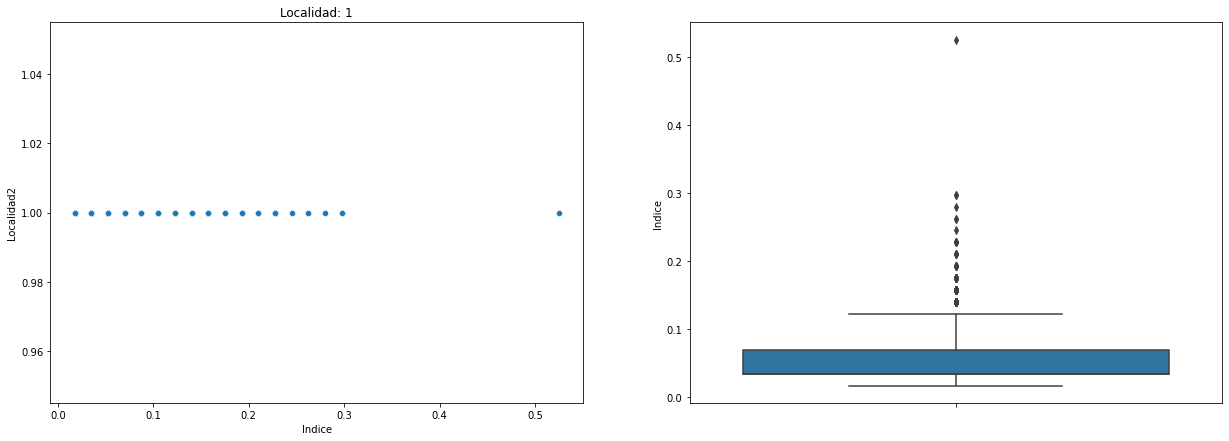

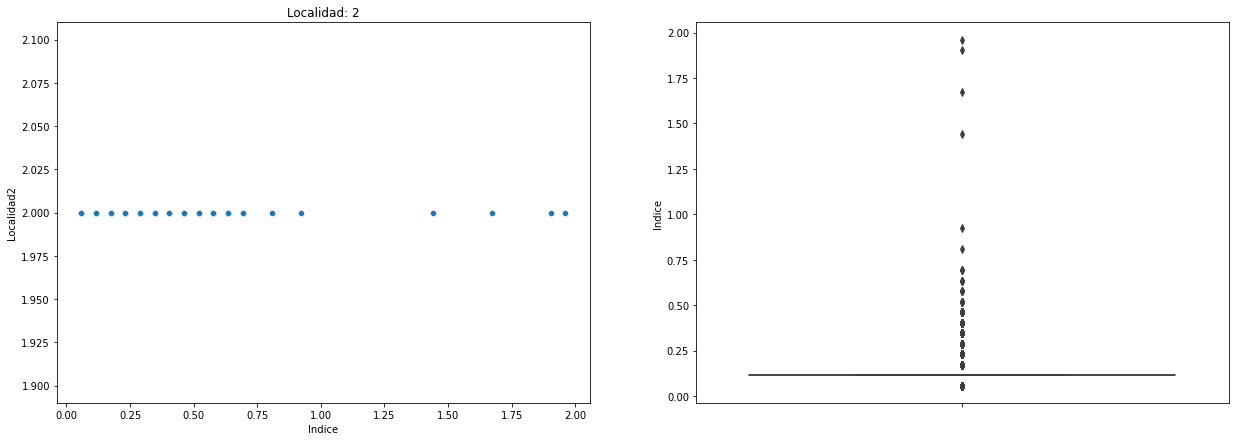

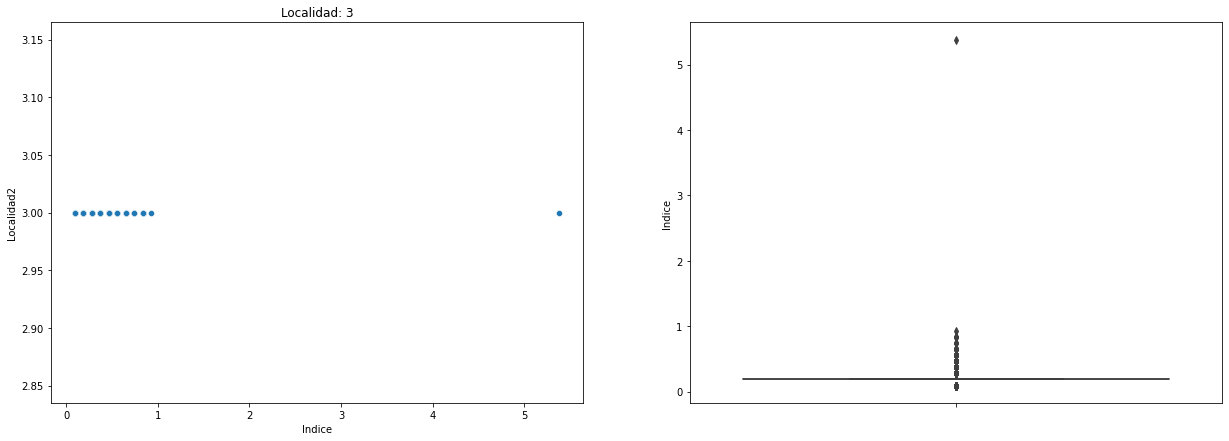

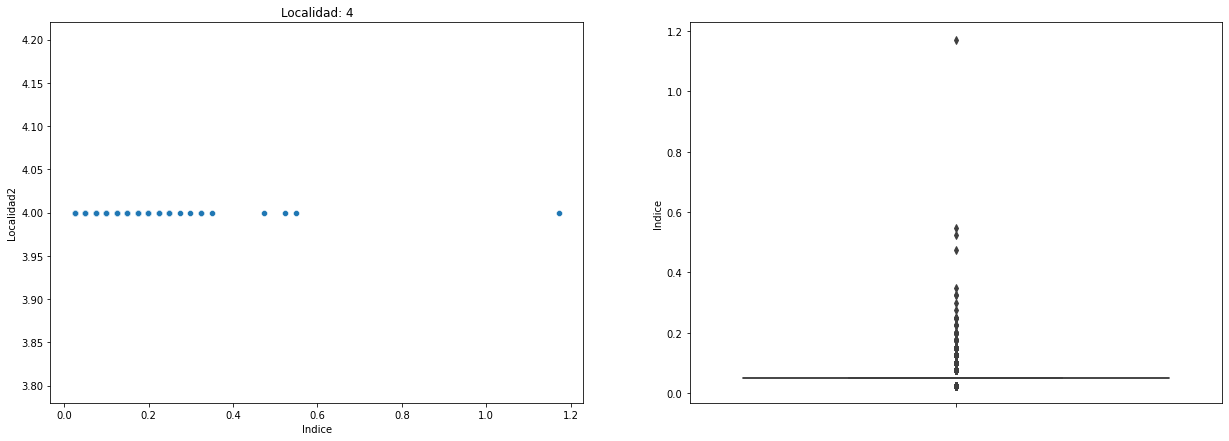

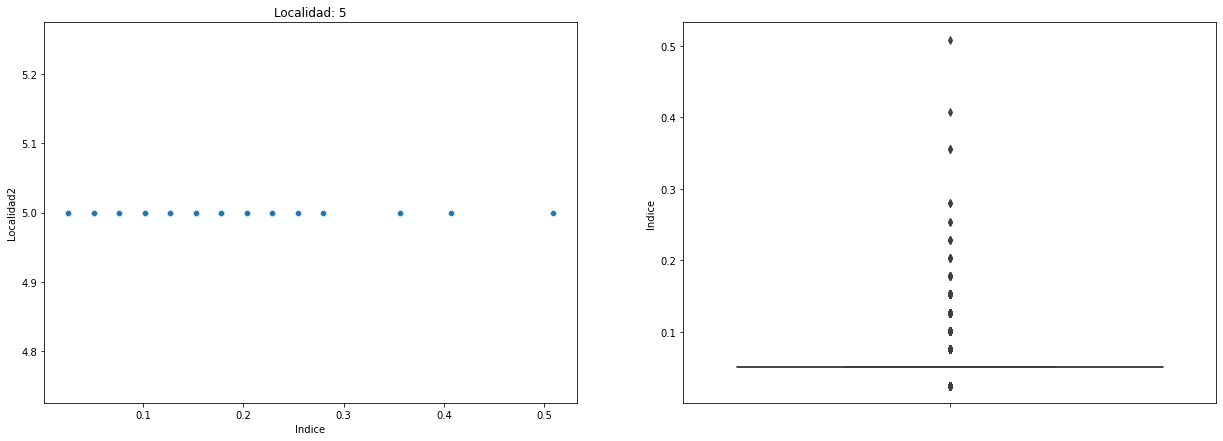

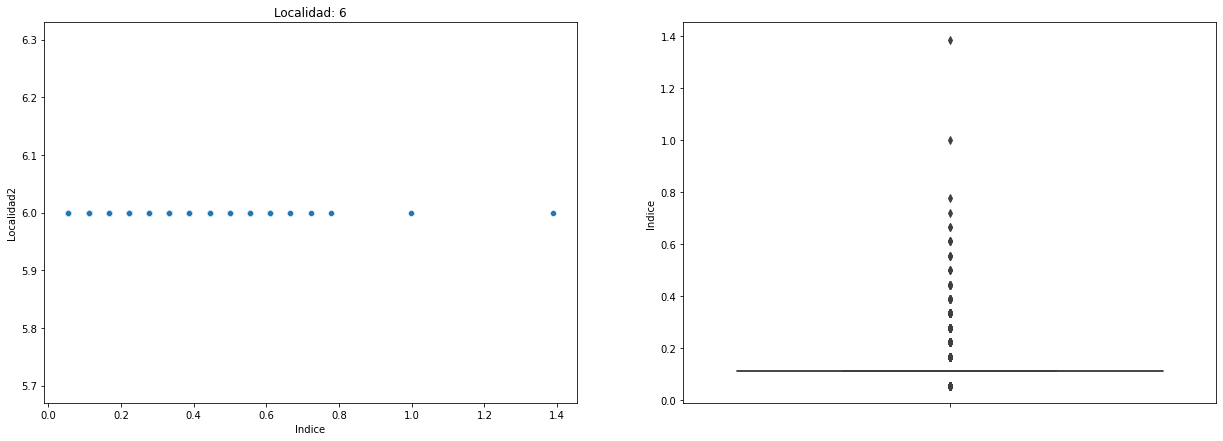

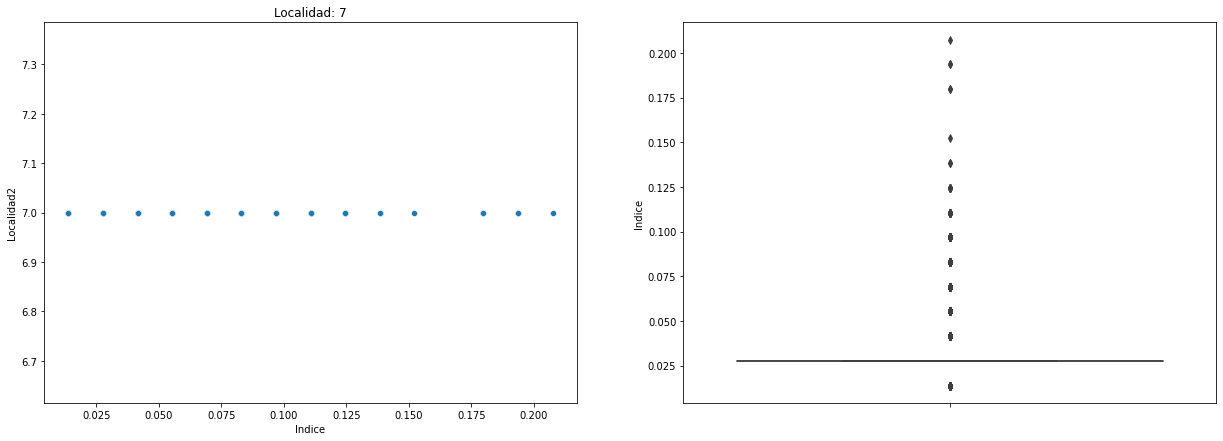

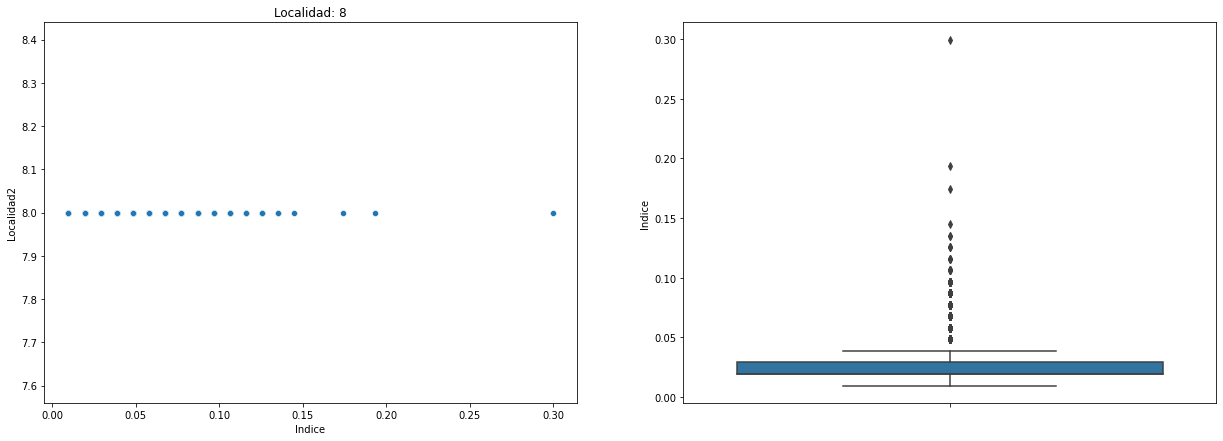

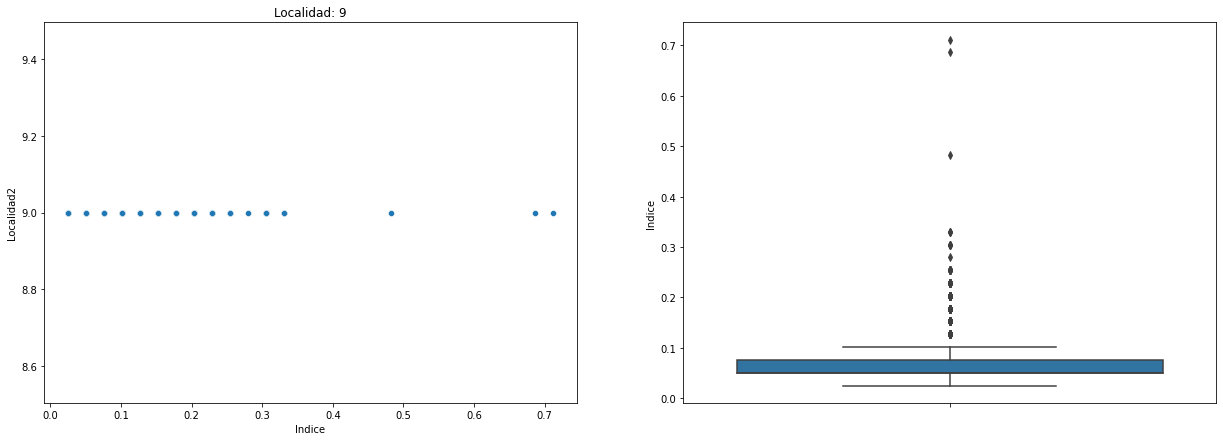

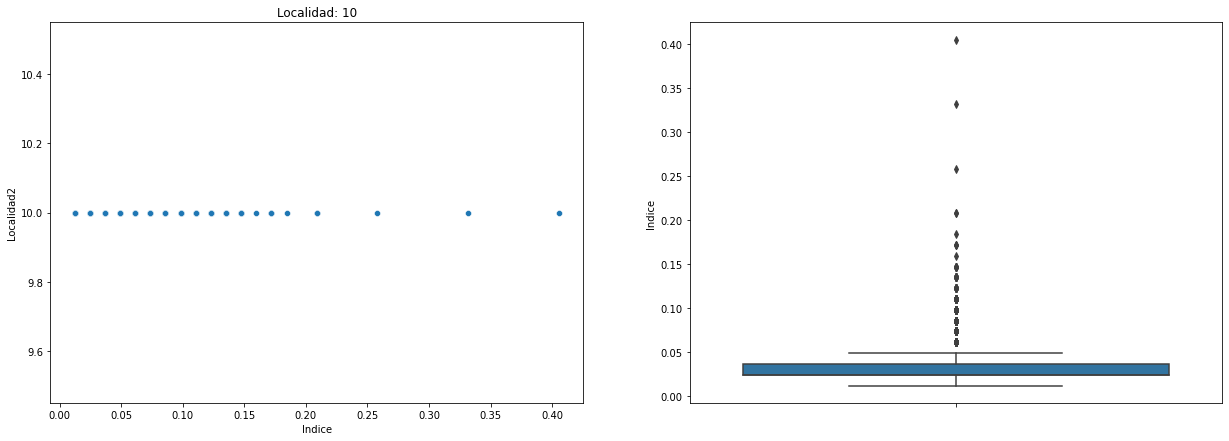

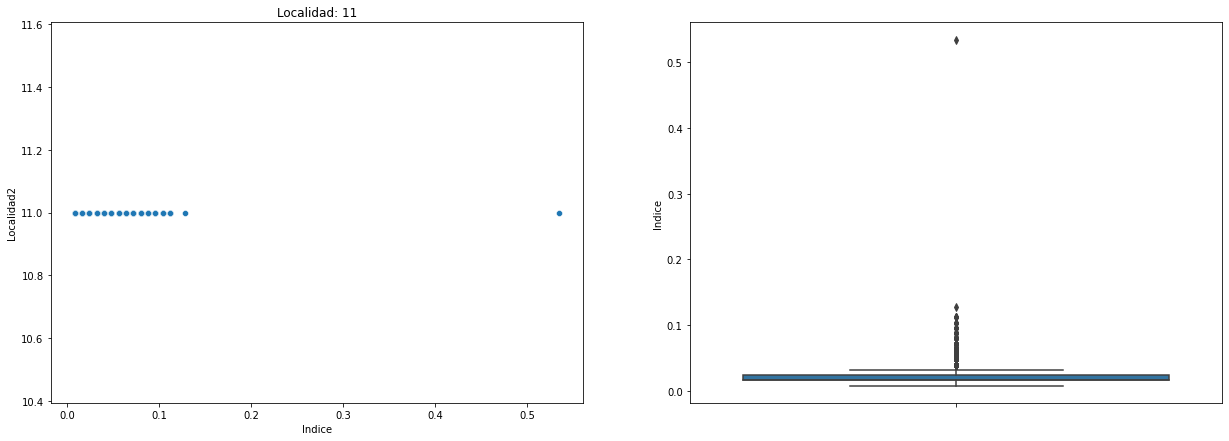

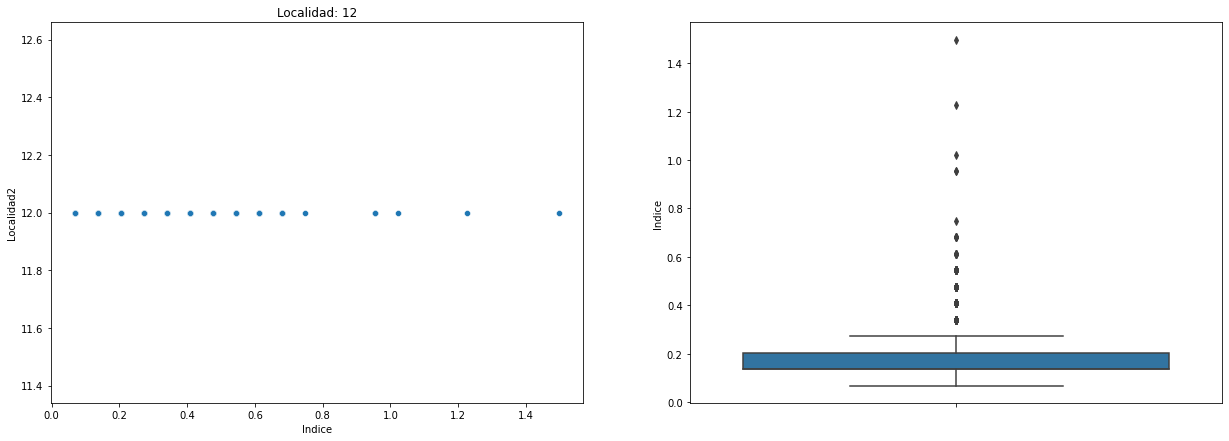

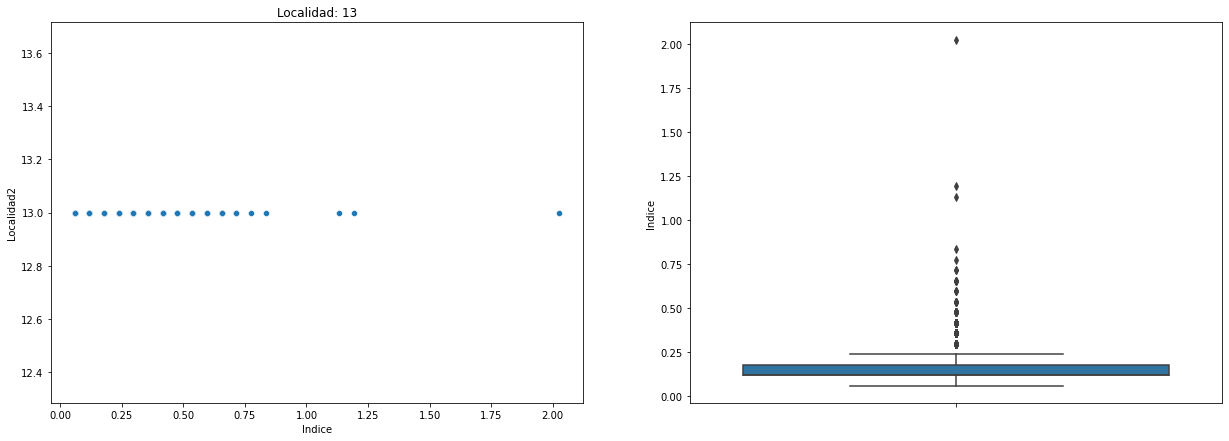

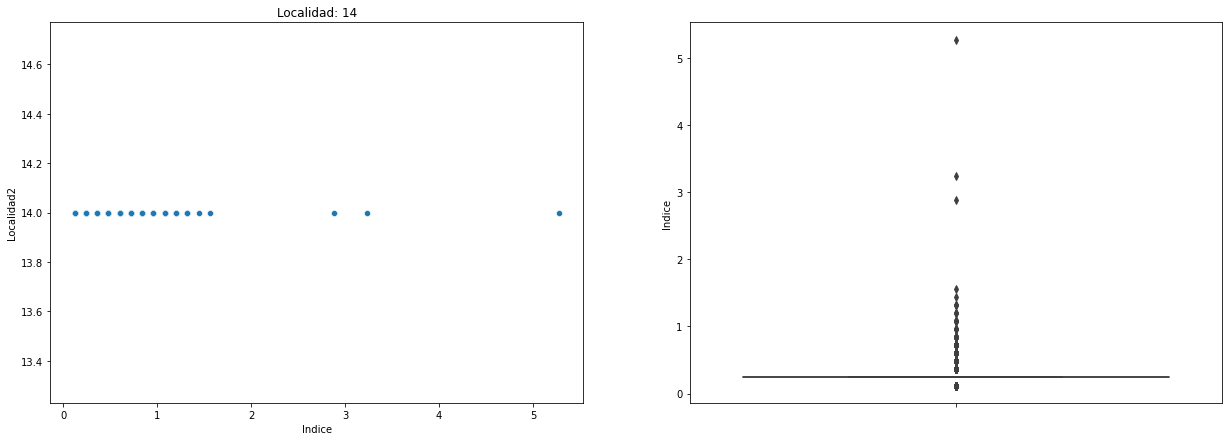

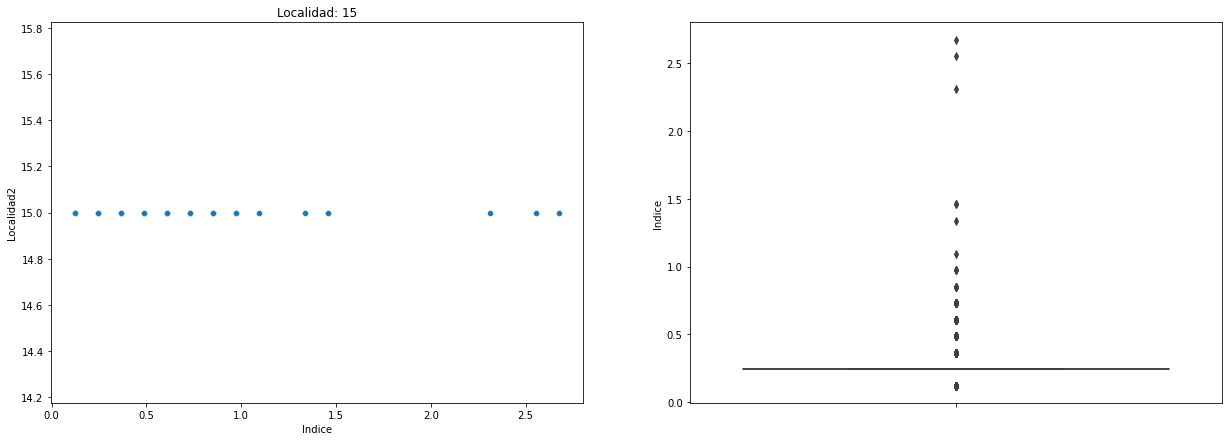

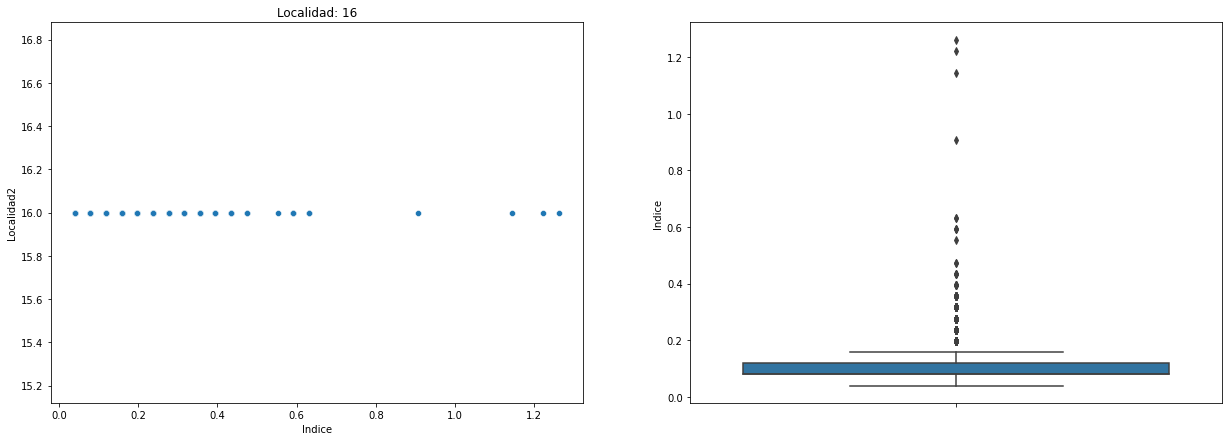

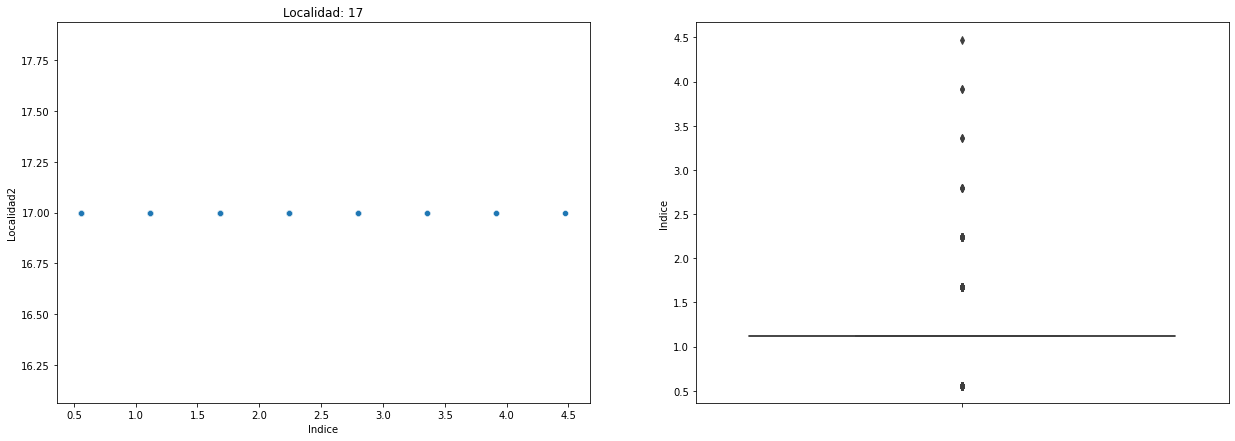

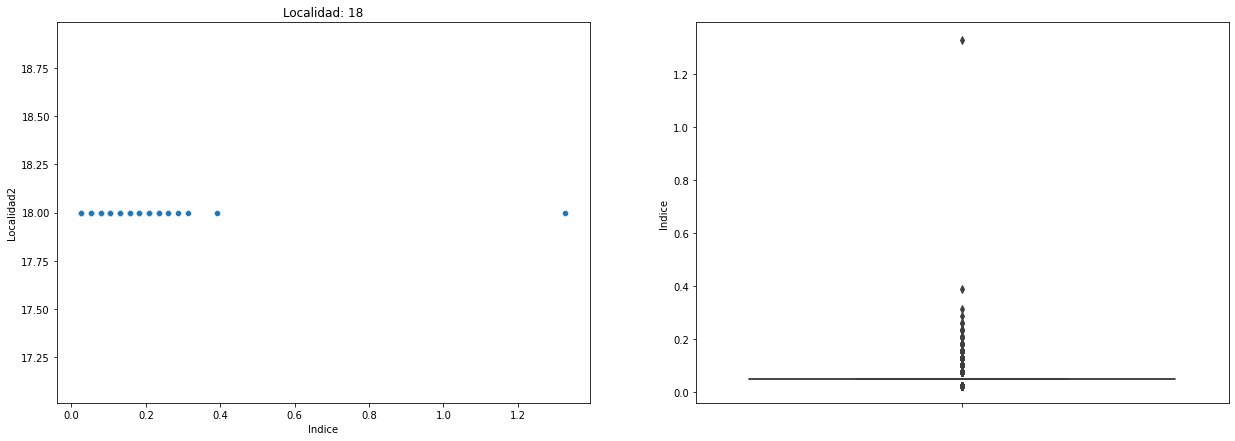

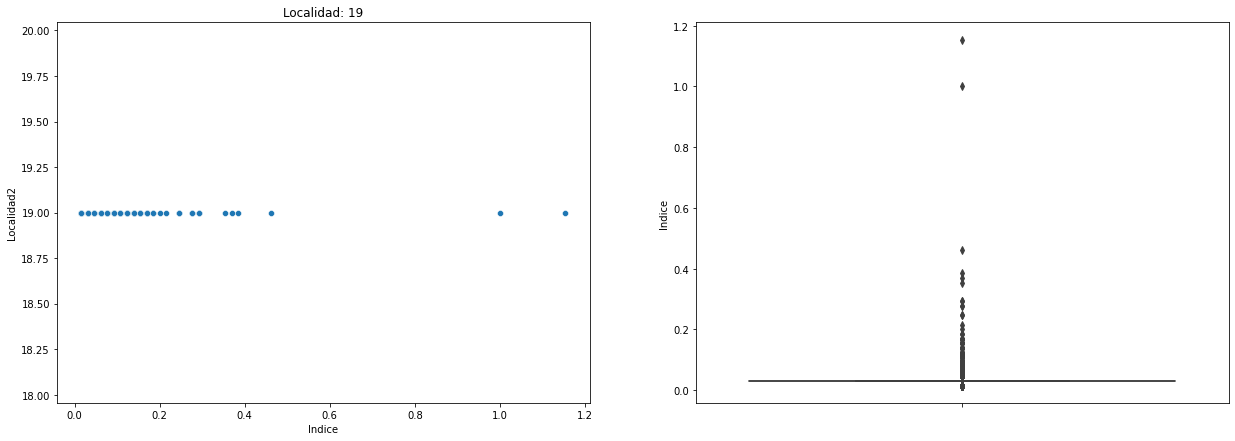

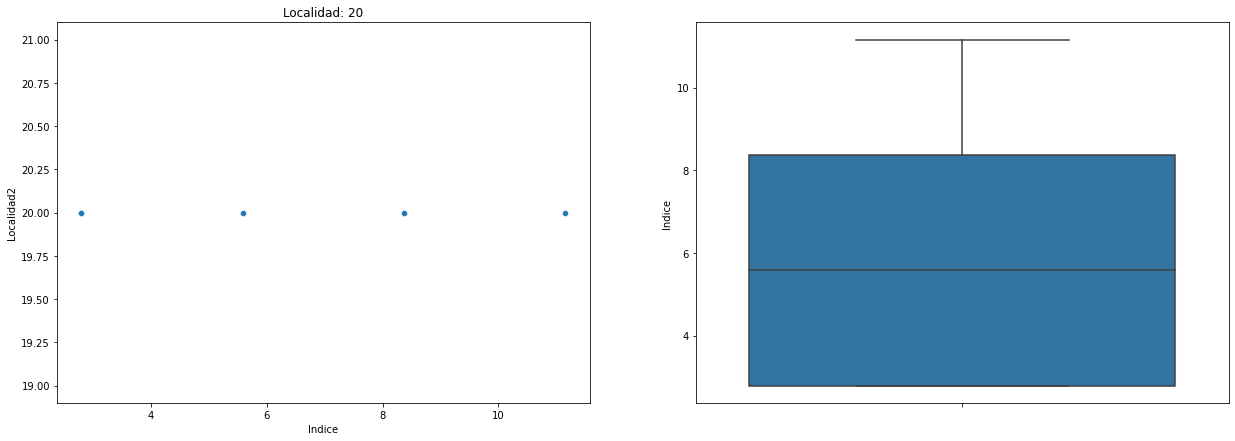

In [39]:
## Validación para todas las localidades

for i in range(1, 21):
  fig, axs = plt.subplots(1, 2, figsize=(21, 7))
  data_X = df_final.loc[df_final['Localidad2'] == i]
  sns.scatterplot(data=data_X, x="Indice",y='Localidad2',ax=axs[0]).set_title('Localidad: '+ str(i))
  sns.boxplot(data=data_X, y="Indice",ax=axs[1])
  plt.plot()

In [43]:
## Valores de medidas por localidad

for i in range(1, 21):
  print('***************************** Localidad ' + str(i) + '*****************************')
  data_X = df_final.loc[df_final['Localidad2'] == i]
  printMedidas(data_X)

***************************** Localidad 1*****************************
--- Media o promedio ---
0.048047458028611496
--- Moda ---
0.0350098377644118
--- Mediana ---
0.0350098377644118
--- Cuantiles ---
0.10    0.03501
0.25    0.03501
0.50    0.03501
0.75    0.07002
0.90    0.07002
Name: Indice, dtype: float64
***************************** Localidad 2*****************************
--- Media o promedio ---
0.14269989563154734
--- Moda ---
0.11537152515387677
--- Mediana ---
0.11537152515387677
--- Cuantiles ---
0.10    0.115372
0.25    0.115372
0.50    0.115372
0.75    0.115372
0.90    0.230743
Name: Indice, dtype: float64
***************************** Localidad 3*****************************
--- Media o promedio ---
0.21036594698958866
--- Moda ---
0.1855562977807467
--- Mediana ---
0.1855562977807467
--- Cuantiles ---
0.10    0.185556
0.25    0.185556
0.50    0.185556
0.75    0.185556
0.90    0.278334
Name: Indice, dtype: float64
***************************** Localidad 4****************

In [46]:
## Categorizar el índice con base a la evaluación de medidas y cuartiles por localidad
## Se toman los valores de cuartiles, siendo 0.049 el segundo cuartil y 0.11 tercer cuartil
## 0 - BAJO, 1 - MEDIO, 2 - ALTO

conditions = [
    (df_final['Indice'] <= 0.049),
    (df_final['Indice'] > 0.049) & (df_final['Indice'] <= 0.11),
    (df_final['Indice'] > 0.11)
    ]
values = ['0','1','2']
df_final['ACCIDENTALIDAD'] = np.select(conditions, values)
df_final

,Dia,HORA_PROCESADA,MES_PROCESADO_x,CANTIDAD_ACCIDENTES,Localidad2,Poblacion,Extension,Urbana,Rural,Indice,ACCIDENTALIDAD
Localidad,,,,,,,,,,,
1,7,6,1,2,1,571268,65.54,1,0,0.035010,0
1,7,13,1,2,1,571268,65.54,1,0,0.035010,0
1,1,17,1,2,1,571268,65.54,1,0,0.035010,0
1,1,18,1,4,1,571268,65.54,1,0,0.070020,1
1,2,2,1,1,1,571268,65.54,1,0,0.017505,0
...,...,...,...,...,...,...,...,...,...,...,...
20,5,17,2,4,20,3584,780.96,0,1,11.160714,2
20,4,6,4,1,20,3584,780.96,0,1,2.790179,2
20,6,15,9,1,20,3584,780.96,0,1,2.790179,2


In [47]:
## Binarizar las variables categóricas

dum_df = pd.get_dummies(df_final, columns=["Dia"], prefix=["Dia_is"] )
dum_df = pd.get_dummies(dum_df, columns=["Localidad2"], prefix=["Localidad_is"] )
dum_df = pd.get_dummies(dum_df, columns=["MES_PROCESADO_x"], prefix=["Mes_is"] )
dum_df = pd.get_dummies(dum_df, columns=["HORA_PROCESADA"], prefix=["Hora_is"] )

dum_df

,CANTIDAD_ACCIDENTES,Poblacion,Extension,Urbana,Rural,Indice,ACCIDENTALIDAD,Dia_is_1,Dia_is_2,Dia_is_3,Dia_is_4,Dia_is_5,Dia_is_6,Dia_is_7,Localidad_is_1,Localidad_is_2,Localidad_is_3,Localidad_is_4,Localidad_is_5,Localidad_is_6,Localidad_is_7,Localidad_is_8,Localidad_is_9,Localidad_is_10,Localidad_is_11,Localidad_is_12,Localidad_is_13,Localidad_is_14,Localidad_is_15,Localidad_is_16,Localidad_is_17,Localidad_is_18,Localidad_is_19,Localidad_is_20,Mes_is_1,Mes_is_2,Mes_is_3,Mes_is_4,Mes_is_5,Mes_is_6,Mes_is_7,Mes_is_8,Mes_is_9,Mes_is_10,Mes_is_11,Mes_is_12,Hora_is_0,Hora_is_1,Hora_is_2,Hora_is_3,Hora_is_4,Hora_is_5,Hora_is_6,Hora_is_7,Hora_is_8,Hora_is_9,Hora_is_10,Hora_is_11,Hora_is_12,Hora_is_13,Hora_is_14,Hora_is_15,Hora_is_16,Hora_is_17,Hora_is_18,Hora_is_19,Hora_is_20,Hora_is_21,Hora_is_22,Hora_is_23
Localidad,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,571268,65.54,1,0,0.035010,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,571268,65.54,1,0,0.035010,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,571268,65.54,1,0,0.035010,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,571268,65.54,1,0,0.070020,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,571268,65.54,1,0,0.017505,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,4,3584,780.96,0,1,11.160714,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20,1,3584,780.96,0,1,2.790179,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,1,3584,780.96,0,1,2.790179,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [48]:
## Guardar Dataset final

dum_df.to_csv('completo_codificado.csv', index=False)